In [1]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from inference import plot
from lstm_vary import train_vary
from load_data import load_data, prune

In [2]:
train_trials, eval_trials, test_trials = load_data('danny', ['branson','eric', 'mattia', 'nicolas'])

# accuracies of the best models for each input type
model_accuracies = []

In [3]:
def get_top_models(model_names, accuracies, parameters, top_n=10):
     # get indicies for top models
    top_indicies = sorted(range(len(accuracies)), key=lambda i: accuracies[i])[-top_n:]

    # get names for top models
    top_models = [model_names[i] for i in top_indicies]

    # get accuracies for top models
    top_accuracies = [accuracies[i] for i in top_indicies]

    # get params for top models
    top_parameters = [parameters[i] for i in top_indicies]

    tops = (list(zip(top_accuracies, top_parameters)))
    pprint(tops)

    return top_models[-1], top_accuracies[-1]

### Oracle

In [10]:
# Aaronson Oracle Accuracies for windows 4, 5, 6 for reference
window_sizes = [3, 4, 5, 6, 7]
oracle_results = oracle(window_sizes, test_trials, cutoff=True, logging=False)

window_size = 0
oracle_accuracy = 0

for w in window_sizes:
    if oracle_results[w]['accuracy'] > oracle_accuracy:
        window_size = w
        oracle_accuracy = oracle_results[w]['accuracy']

print(window_size, round(oracle_accuracy, 2))

4 59.98


### Binary

In [5]:
train_trials_binary = prune(train_trials, 'binary')
eval_trials_binary = prune(eval_trials, 'binary')
test_trials_binary = prune(test_trials, 'binary')

In [7]:
models = []
parameters = []
accuracies = []

for _ in range(10):
    model_name, params, accuracy = train_vary(
        train_trials_binary, eval_trials_binary, test_trials_binary, 
        random='binary', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_binary_model, top_binary_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_binary_acc)

[(47.66599602946331,
  {'batch_size': 190,
   'hidden_size': 90,
   'input_size': 1,
   'learning_rate': 0.0163,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (47.66599602946331,
  {'batch_size': 190,
   'hidden_size': 90,
   'input_size': 1,
   'learning_rate': 0.0041,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (48.467430742499936,
  {'batch_size': 150,
   'hidden_size': 90,
   'input_size': 1,
   'learning_rate': 0.0034,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (49.35284025559531,
  {'batch_size': 180,
   'hidden_size': 90,
   'input_size': 1,
   'learning_rate': 0.0037,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (53.20036181564008,
  {'batch_size': 210,
   'hidden_size': 30,
   'input_size': 1,
   'learning_rate': 0.0136,
   'num_epochs': 1,
   'num_stacked_layers': 1}),
 (54.29869626694234,
  {'batch_size': 190,
   'hidden_size': 70,
   'input_size': 1,
   'learning_rate': 0.0214,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (55.663747390250236,

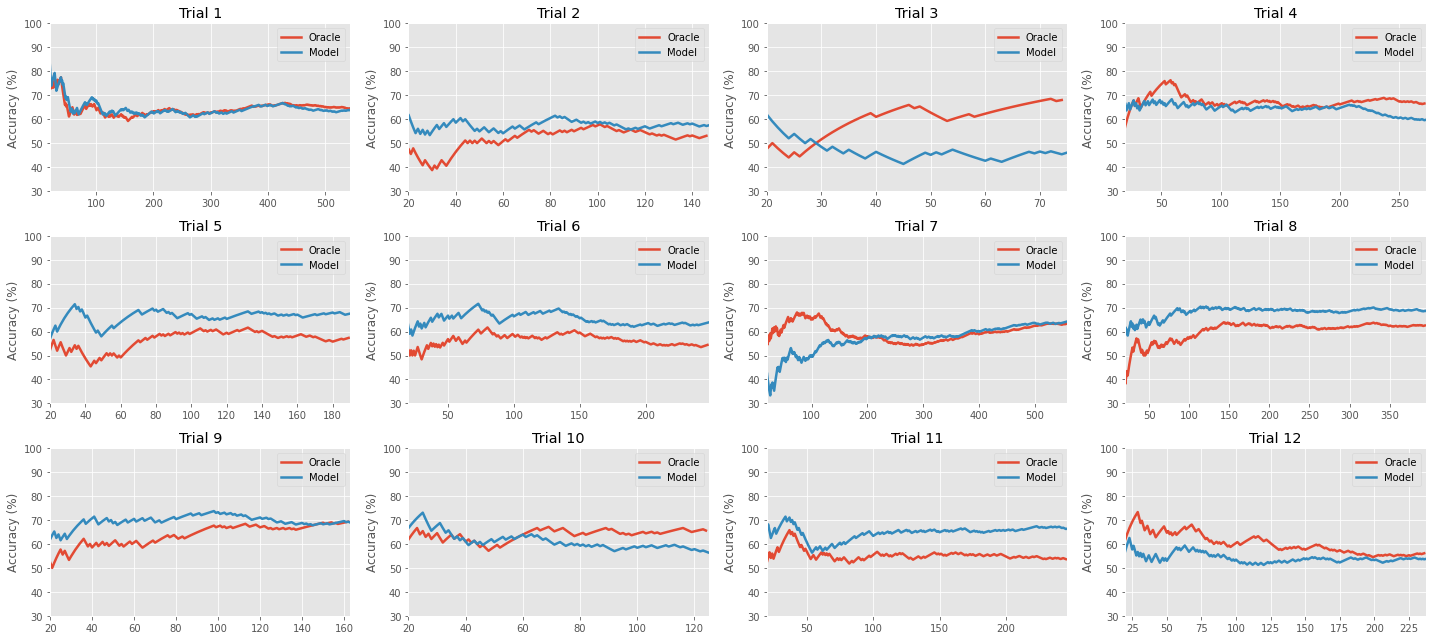

In [ ]:
plot(test_trials, test_trials_binary, window_size, top_binary_model, cutoff=True)

### Delay

In [8]:
train_trials_delay = prune(train_trials, 'delay')
eval_trials_delay = prune(eval_trials, 'delay')
test_trials_delay = prune(test_trials, 'delay')

In [9]:
models = []
parameters = []
accuracies = []

for _ in range(10):
    model_name, params, accuracy = train_vary(
        train_trials_delay, eval_trials_delay, test_trials_delay, 
        random='delay', logging=False,
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_delay_model, top_delay_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_delay_acc)

[(47.624277214277654,
  {'batch_size': 150,
   'hidden_size': 80,
   'input_size': 2,
   'learning_rate': 0.0288,
   'num_epochs': 1,
   'num_stacked_layers': 3}),
 (47.66599602946331,
  {'batch_size': 190,
   'hidden_size': 50,
   'input_size': 2,
   'learning_rate': 0.0032,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (47.66599602946331,
  {'batch_size': 210,
   'hidden_size': 40,
   'input_size': 2,
   'learning_rate': 0.0261,
   'num_epochs': 1,
   'num_stacked_layers': 3}),
 (47.66599602946331,
  {'batch_size': 160,
   'hidden_size': 80,
   'input_size': 2,
   'learning_rate': 0.0235,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (48.078552798441756,
  {'batch_size': 220,
   'hidden_size': 30,
   'input_size': 2,
   'learning_rate': 0.0101,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (52.259064137050885,
  {'batch_size': 180,
   'hidden_size': 80,
   'input_size': 2,
   'learning_rate': 0.0304,
   'num_epochs': 1,
   'num_stacked_layers': 2}),
 (55.52152098799061

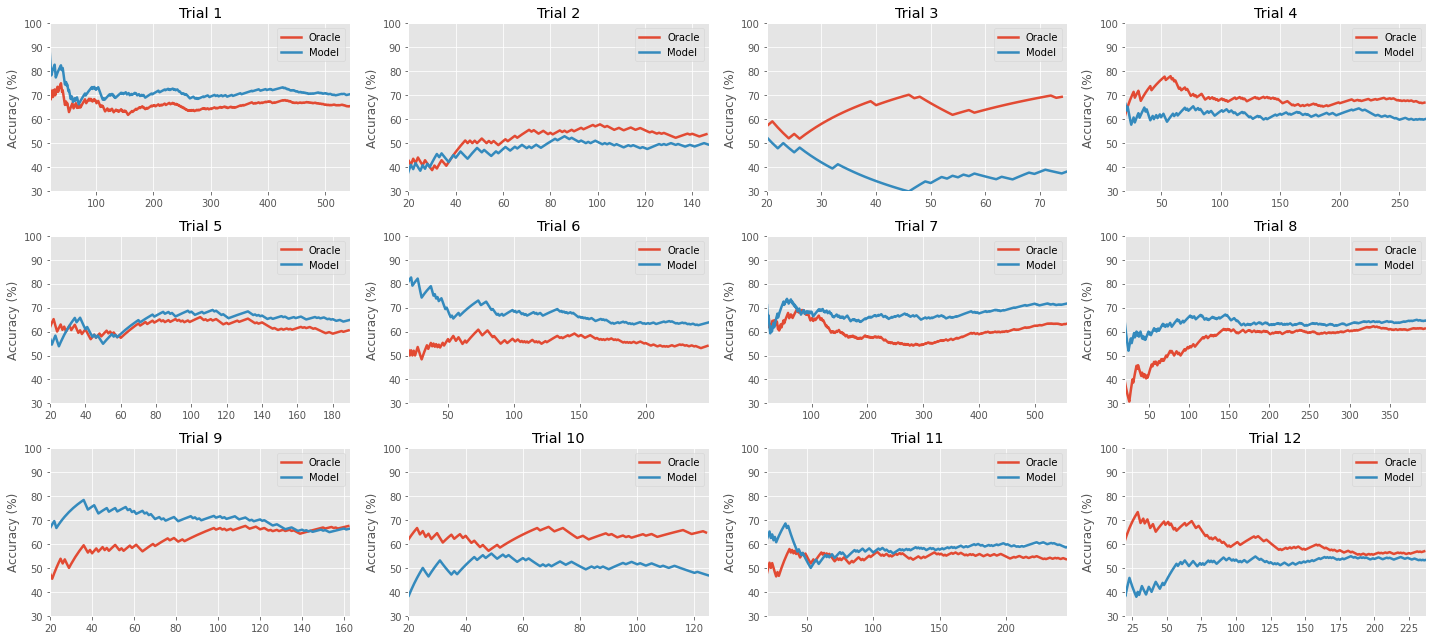

In [ ]:
plot(test_trials, test_trials_delay, window_size, top_delay_model, cutoff=True)

### Pupils

In [12]:
train_trials_pupil = prune(train_trials, 'pupil')
eval_trials_pupil = prune(eval_trials, 'pupil')
test_trials_pupil = prune(test_trials, 'pupil')

In [14]:
models = []
parameters = []
accuracies = []

for _ in range(1):
    model_name, params, accuracy = train_vary(
        train_trials_pupil, eval_trials_pupil, test_trials_pupil, 
        random='pupil', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_pupil_model, top_pupil_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_pupil_acc)

[(47.66599602946331,
  {'batch_size': 210,
   'hidden_size': 70,
   'input_size': 2,
   'learning_rate': 0.0038,
   'num_epochs': 1,
   'num_stacked_layers': 3})]


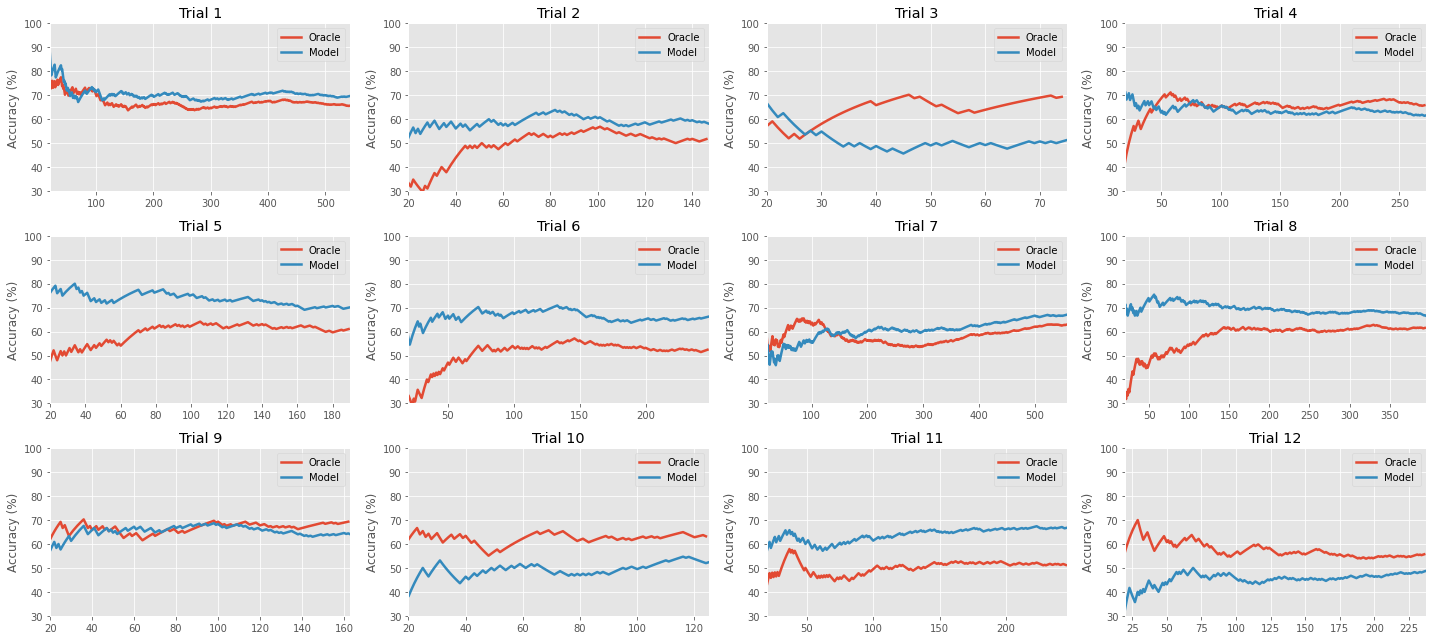

In [ ]:
plot(test_trials, test_trials_pupil, window_size, top_pupil_model, cutoff=True)

### Delay + Pupil

In [ ]:
models = []
parameters = []
accuracies = []

for _ in range(1):
    model_name, params, accuracy = train_vary(
        train_trials, eval_trials, test_trials, 
        random='all', logging=False
    )
    models.append(model_name)
    parameters.append(params)
    accuracies.append(accuracy)

top_all_model, top_all_acc = get_top_models(models, accuracies, parameters)
model_accuracies.append(top_all_acc)

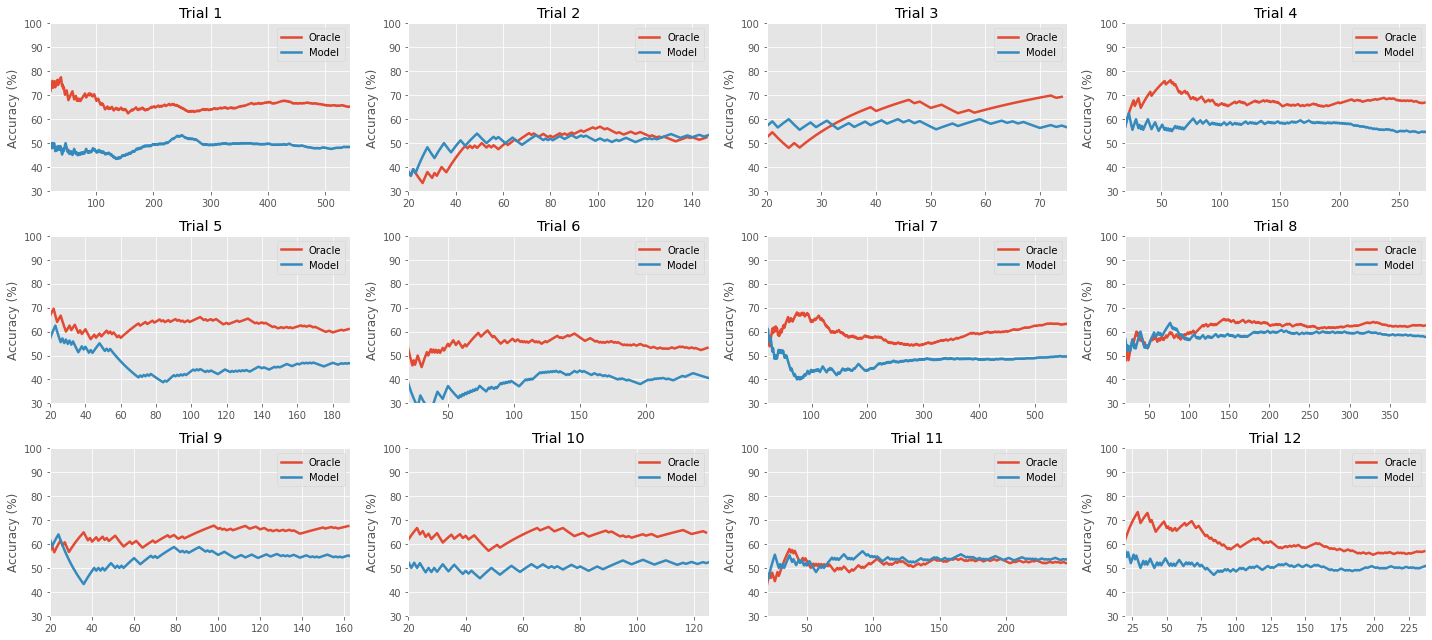

In [ ]:
plot(test_trials, test_trials, window_size, top_all_model, cutoff=True)

### Plotting

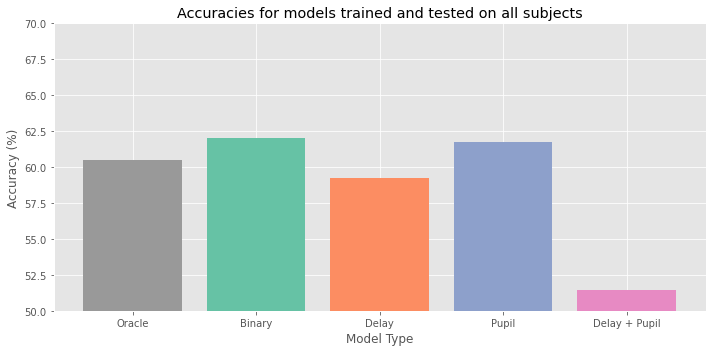

In [ ]:
# use oracle accuracy and model accuracies to plot one bar chart of the results

plt.figure(figsize=(10, 5))
colors = ['#999999', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
plt.bar(['Oracle', 'Binary', 'Delay', 'Pupil', 'Delay + Pupil'], [oracle_accuracy, *model_accuracies], color=colors)
plt.title('Accuracies for models trained and tested on all subjects')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model Type')
plt.ylim(50, 70)
plt.tight_layout()
plt.savefig('plots/vary_o2m.png')
plt.show()
